A series of sanity checks

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal, random
from scipy.optimize import curve_fit

from local_utils import *

BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'
aspect_ratio = 16./9

In [3]:
# With sigma = 1, Sx/n should be the average value of x.
print(calc_S(sigma), calc_analytic_S(sigma[0], num_sensors))
print(calc_Sx(x, sigma), calc_analytic_Sx(delta_x, sigma[0], num_sensors))
# print(calc_Sy(y, sigma)/len(y), np.mean(y)) # There is no analytic Sy!
print(calc_Sxx(x, sigma), calc_analytic_Sxx(delta_x, sigma[0], num_sensors))
# print(calc_Syy(y, 1.)/len(y), np.mean(y**2))
# print(calc_Sxy(x, y, 1.)/len(x), np.mean(x*y))
print(calc_Delta(x, sigma), calc_analytic_Delta(delta_x, sigma[0], num_sensors))

NameError: name 'sigma' is not defined

In [2]:
num_points = 4
# z = np.array([1., 2., 4., 8.])
z = 2.**(np.linspace(0, 5, num_points))
x = np.log(z/np.min(z))
# x = np.linspace(np.min(z), np.max(z), 100)
delta_x = np.log(z[1]/z[0])
slope = 148.
intercept = 480.
y = slope*x + intercept
sigma = 20.

analytic_sigma_slope = sigma_slope(x, sigma*np.ones_like(x))    
analytic_sigma_intercept = sigma_intercept(x, sigma*np.ones_like(x))
analytic_unc = np.array([analytic_sigma_slope, analytic_sigma_intercept])

noisy_y = (y + normal(scale=sigma, size=len(x)))
    
popt, pcov = np.polyfit(x, noisy_y, 1, w=1./sigma*np.ones_like(x), cov=True)
unc = np.sqrt(np.diag(pcov))
print("popt: ", popt)
print("unc: ", unc)
print("analytic_sigma_slope, analytic_sigma_intercept: ", analytic_sigma_slope, analytic_sigma_intercept)

redchisq0 = redchisqg(noisy_y, np.polyval(popt, x), sd=sigma)
print("redchisq0: ", redchisq0)

redchisq_plus = redchisqg(noisy_y, np.polyval(popt + unc, x), sd=sigma)
print("redchisq_plus: ", redchisq_plus)
redchisq_minus = redchisqg(noisy_y, np.polyval(popt - unc, x), sd=sigma)
print("redchisq_minus: ", redchisq_minus)

redchisq_analytic_plus = redchisqg(noisy_y, np.polyval(popt + analytic_unc, x), sd=sigma)
print("redchisq_analytic_plus: ", redchisq_analytic_plus)
redchisq_analytic_minus = redchisqg(noisy_y, np.polyval(popt - analytic_unc, x), sd=sigma)
print("redchisq_analytic_minus: ", redchisq_analytic_minus)

# num_points = 4
# unc:  [3.47552737 7.51153933]
# analytic_sigma_slope, analytic_sigma_intercept:  7.742314037350946 16.733200530681508
# redchisq0:  0.40302302181207844
# redchisq_plus:  0.9113352470709994
# redchisq_minus:  0.91133524707098
# redchisq_analytic_plus:  2.9255202378442924
# redchisq_analytic_minus:  2.9255202378442298



popt:  [145.30353442 494.0696094 ]
unc:  [4.07388751 8.80475479]
analytic_sigma_slope, analytic_sigma_intercept:  7.742314037350946 16.733200530681508
redchisq0:  0.5537407641606453
redchisq_plus:  3.3473598361581316
redchisq_minus:  3.3473598361581427
redchisq_analytic_plus:  10.643729628289396
redchisq_analytic_minus:  10.643729628289394


[0.15215327 0.30452629]
chisq0:  928.0754862843596
np.abs(delta_fit_slope[srt_ind][0:2] - popt[0]) - unc[0]:  [-0.26893559 -0.26893559]
np.abs(delta_fit_slope[srt_ind][0:2] - popt[0]) - analytic_unc[0]:  [-0.29545933 -0.29545933]


(147.84771468690172, 148.4792401393671)

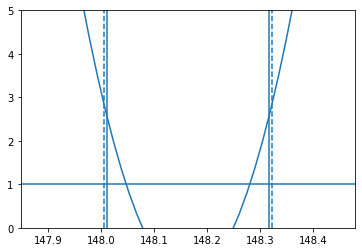

In [3]:
num_points = 1000
# z = np.array([1., 2., 4., 8.])
z = 2.**(np.linspace(0, 5, num_points))
x = np.log(z/np.min(z))
# x = np.linspace(np.min(z), np.max(z), 100)
delta_x = np.log(z[1]/z[0])
slope = 148.
intercept = 480.
y = slope*x + intercept
sigma = 5.

analytic_sigma_slope = sigma_slope(x, sigma*np.ones_like(x))    
analytic_sigma_intercept = sigma_intercept(x, sigma*np.ones_like(x))
analytic_unc = np.array([analytic_sigma_slope, analytic_sigma_intercept])

noisy_y = (y + normal(scale=sigma, size=len(x)))
    
popt, pcov = np.polyfit(x, noisy_y, 1, w=1./sigma*np.ones_like(x), cov=True)
unc = np.sqrt(np.diag(pcov))
print(unc)
chisq0 = chisqg(noisy_y, np.polyval([slope, intercept], x), sd=sigma)
print("chisq0: ", chisq0)

# Rescale uncertainties because why not?
# unc *= np.sqrt(chisq0/(len(x) - 2))
# analytic_unc *= np.sqrt(chisq0/(len(x) - 2))

delta_fit_slope = np.linspace(popt[0]*0.95, popt[0]*1.05, 1000)
delta_chisq = np.zeros_like(delta_fit_slope)
for i in range(len(delta_fit_slope)):
    delta_chisq[i] = chisqg(noisy_y, np.polyval([delta_fit_slope[i], popt[1]], x), sd=sigma) - chisq0
    
srt_ind = np.argsort(np.abs(delta_chisq - 1.))
print("np.abs(delta_fit_slope[srt_ind][0:2] - popt[0]) - unc[0]: ", 
      (np.abs(delta_fit_slope[srt_ind][0:2] - popt[0]) - unc[0])/unc[0])
print("np.abs(delta_fit_slope[srt_ind][0:2] - popt[0]) - analytic_unc[0]: ", 
      (np.abs(delta_fit_slope[srt_ind][0:2] - popt[0]) - analytic_unc[0])/analytic_unc[0])

plt.plot(delta_fit_slope, delta_chisq)
plt.axvline(popt[0] + unc[0])
plt.axvline(popt[0] - unc[0])

plt.axvline(popt[0] + analytic_unc[0], ls='--')
plt.axvline(popt[0] - analytic_unc[0], ls='--')

plt.axhline(1)

plt.ylim([0, 5])
plt.xlim([popt[0] - 2*np.max([unc[0], analytic_unc[0]]), popt[0] + 2*np.max([unc[0], analytic_unc[0]])])

15.88559772828654
15.60780285068667
0.8107955445624249
0.8


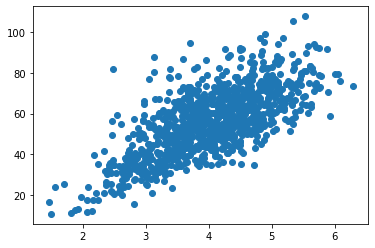

In [4]:
# Everything checks out - I am, in principle, calculating the uncertainties correctly.

def calc_sigma_zstar(z0, slope, intercept, sigma_slope, sigma_intercept, kappa=0.4):
    zstar = calc_zstar_from_slope_and_intercept(z0, slope, intercept)
    return zstar*intercept/slope*np.sqrt((sigma_slope/slope)**2 + (sigma_intercept/intercept)**2)

def calc_sigma_ustar(sigma_slope, kappa=0.4):
    return kappa*sigma_slope

# Just checking whether I have any idea what I'm doing
num_points = 1000

mean_slope = 10
std_slope = 2

mean_intercept = 10
std_intercept = 2

z0 = 150. # cm

ms = normal(scale=std_slope, size=num_points) + mean_slope
bs = normal(scale=std_intercept, size=num_points) + mean_intercept

ustars = calc_ustar_from_slope(ms)
zstars = calc_zstar_from_slope_and_intercept(z0, ms, bs)

plt.scatter(ustars, zstars)

print(np.std(zstars))
print(calc_sigma_zstar(z0, mean_slope, mean_intercept, std_slope, std_intercept))

print(np.std(ustars))
print(calc_sigma_ustar(std_slope))

In [8]:
# Now checking whether my analytic expressions (now corrected and corrected and corrected) match up
num_sensors = 4
base = 2.
delta_x = np.log(base)
z = 2.**np.arange(0, num_sensors, 1)
x = np.log(z/np.min(z))

slope = 148.
intercept = 480.
y = slope*x + intercept
sigma = (np.max(y) - np.min(y))/100.

num_tries = 1

for i in range(num_tries):
    noisy_y = (y + normal(scale=sigma, size=len(x)))
#     noisy_y = y
    
    popt, pcov = np.polyfit(x, noisy_y, 1, w=1/sigma*np.ones_like(x), cov='unscaled')
    unc = np.sqrt(np.diag(pcov))
    
    # Rescale uncertainties because why not?
    mod = np.polyval(popt, x)
    rescaled_sigma = rescale_sigma(noisy_y, mod, sigma)
    
    # Analytic solutions
    analytic_slope = calc_analytic_slope(delta_x, sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_intercept = calc_analytic_intercept(delta_x, sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_sigma_slope = calc_analytic_sigma_slope(delta_x, sigma, num_sensors)
    analytic_sigma_intercept = calc_analytic_sigma_intercept(sigma, num_sensors)
    
    # Numerical solutions
#     analytic_slope = calc_slope(x, noisy_y, rescaled_sigma*np.ones_like(x))
#     analytic_intercept = calc_intercept(x, noisy_y, rescaled_sigma*np.ones_like(x))
#     analytic_sigma_slope = sigma_slope(x, rescaled_sigma*np.ones_like(x))    
#     analytic_sigma_intercept = sigma_intercept(x, rescaled_sigma*np.ones_like(x))
    
    print(popt)
    print(unc)
    print([analytic_slope, analytic_intercept])
    print([analytic_sigma_slope, analytic_sigma_intercept])
  
# num_sensors = 100
# [148.22078701 488.59145232]
# [ 0.53294481 21.16782374]
# [148.22078701230407, 488.5914523194569]
# [0.5075855485619255, 20.160589191732655]

# num_sensors = 4
# [147.75614274 478.9749204 ]
# [2.50356034 3.24651599]
# [147.7561427381081, 478.9749203971347]
# [1.985628364019813, 2.5748827108481067]

# num_sensors = 4, noisy_y = y 
# [148. 480.]
# [2.75644840e-14 3.57445101e-14]
# [148.00000000000009, 480.0000000000001]
# [1.985628364019813, 2.5748827108481067]

# num_sensors = 100, noisy_y = y 
# [148. 480.]
# [5.62935249e-15 2.23590020e-13]
# [148.00000000000003, 480.0000000000023]
# [0.5075855485619255, 20.160589191732655]

[147.62979067 480.99589967]
[1.98562836 2.57488271]
[147.6297906663161, 480.99589967060473]
[1.985628364019813, 2.5748827108481067]


In [37]:
# Now checking whether I can reproduce the uncertainties for ustar and zstar
num_sensors = 4
base = 2.
delta_x = np.log(base)
z = 2.**np.arange(0, num_sensors, 1)
x = np.log(z/np.min(z))
kappa = 0.4

slope = 148.
intercept = 480.
ustar = calc_ustar_from_slope(slope)
zstar = calc_zstar_from_slope_and_intercept(np.min(z), slope, intercept)

y = slope*x + intercept
sigma = ustar

num_tries = 1

for i in range(num_tries):
    noisy_y = (y + normal(scale=sigma, size=len(x)))
    
    lin_popt, lin_pcov = np.polyfit(x, noisy_y, 1, w=1/sigma*np.ones_like(x), cov='unscaled')
    lin_unc = np.sqrt(np.diag(lin_pcov))
    
    # Analytic solutions
#     rescaled_sigma = rescale_sigma(noisy_y, np.polyval(lin_popt, x), sigma)
    rescaled_sigma = sigma
    
    analytic_slope = calc_analytic_slope(delta_x, rescaled_sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_intercept = calc_analytic_intercept(delta_x, rescaled_sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_sigma_slope = calc_analytic_sigma_slope(delta_x, rescaled_sigma, num_sensors)
    analytic_sigma_intercept = calc_analytic_sigma_intercept(rescaled_sigma, num_sensors)
    analytic_sigma_intercept_slope = calc_sigma_intercept_slope(delta_x, rescaled_sigma, num_sensors)
    
    analytic_ustar = calc_ustar_from_slope(analytic_slope)
    analytic_zstar = calc_zstar_from_slope_and_intercept(np.min(z), analytic_slope, analytic_intercept)
    
    # Calculating ustar/zstar uncertainties numerically
    profile_popt, profile_pcov = curve_fit(wind_profile, z, noisy_y, p0=[ustar, zstar], 
                                           sigma=sigma*np.ones_like(x))
    profile_unc = np.sqrt(np.diag(profile_pcov))
    print(profile_popt)
    print(profile_unc)

    print(analytic_ustar, analytic_zstar)
    analytic_sigma_ustar = kappa*analytic_sigma_slope
    analytic_sigma_zstar = zstar*(intercept/slope)*np.sqrt((analytic_sigma_slope/analytic_slope)**2 +\
                                                           (analytic_sigma_intercept/analytic_intercept)**2 +\
                                                           (2*analytic_sigma_intercept_slope/intercept/slope))
    print(analytic_sigma_ustar, analytic_sigma_zstar)
  
# The answer is, "Yes, I can reproduce the uncertainties, assuming I rescale sigma."
# num_sensors = 4
# [5.85062481e+01 3.72627181e-02]
# [0.467326   0.00130911]
# 58.506247928137384 0.037262717709311034
# 0.4673260647755731 0.001349832094556615

# num_sensors = 4, but no rescaling sigma
# [5.97503932e+01 4.13807631e-02]
# [0.54532977 0.00162217]
# 59.75039326588868 0.041380763233167916
# 0.7942513456079252 0.002269760275483198

# num_sensors = 100, but no rescaling sigma
# [5.91154616e+01 3.80699978e-02]
# [0.21648215 0.00593535]
# 59.11546165581359 0.03806999875377274
# 0.2030342194247702 0.005665941499986873

# num_sensors = 100 and rescaling sigma
# [5.92326882e+01 4.18291296e-02]
# [0.18371017 0.00551243]
# 59.232688151814585 0.041829126698395634
# 0.18371018491359614 0.005250044619868289

sigma/ustar:  1.0
0.5265005683557408


In [53]:
# Now checking whether I can reproduce the uncertainties for ustar and zstar
num_sensors = 4
base = 2.
delta_x = np.log(base)
z = 2.**np.arange(0, num_sensors, 1)
x = np.log(z/np.min(z))
kappa = 0.4

slope = 148.
intercept = 480.
ustar = calc_ustar_from_slope(slope)
zstar = calc_zstar_from_slope_and_intercept(np.min(z), slope, intercept)

y = slope*x + intercept
sigma = ustar

num_tries = 1

for i in range(num_tries):
    noisy_y = (y + normal(scale=sigma, size=len(x)))
    
    lin_popt, lin_pcov = np.polyfit(x, noisy_y, 1, w=1/sigma*np.ones_like(x), cov='unscaled')
    lin_unc = np.sqrt(np.diag(lin_pcov))
    
    # Analytic solutions
#     rescaled_sigma = rescale_sigma(noisy_y, np.polyval(lin_popt, x), sigma)
    rescaled_sigma = sigma
    
    analytic_slope = calc_analytic_slope(delta_x, rescaled_sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_intercept = calc_analytic_intercept(delta_x, rescaled_sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_sigma_slope = calc_analytic_sigma_slope(delta_x, rescaled_sigma, num_sensors)
    analytic_sigma_intercept = calc_analytic_sigma_intercept(rescaled_sigma, num_sensors)
    analytic_sigma_intercept_slope = calc_sigma_intercept_slope(delta_x, rescaled_sigma, num_sensors)
    
    analytic_ustar = calc_ustar_from_slope(analytic_slope)
    analytic_zstar = calc_zstar_from_slope_and_intercept(np.min(z), analytic_slope, analytic_intercept)
    
    # Calculating ustar/zstar uncertainties numerically
    profile_popt, profile_pcov = curve_fit(wind_profile, z, noisy_y, p0=[ustar, zstar], 
                                           sigma=sigma*np.ones_like(x))
    profile_unc = np.sqrt(np.diag(profile_pcov))

    analytic_sigma_ustar = kappa*analytic_sigma_slope
    analytic_sigma_zstar = zstar*(intercept/slope)*np.sqrt((analytic_sigma_slope/analytic_slope)**2 +\
                                                           (analytic_sigma_intercept/analytic_intercept)**2 +\
                                                           (2*analytic_sigma_intercept_slope/intercept/slope))
    
#     print((analytic_intercept/analytic_slope)**2*analytic_sigma_slope**2)
#     print(np.log(np.min(z)/analytic_zstar)**2*(12/num_sensors/(num_sensors**2 - 1)/delta_x**2)*sigma**2)
#     7015.487972735646
#     7015.487972735645

#     print(analytic_sigma_intercept**2)
#     print(2*(2*num_sensors - 1)/num_sensors/(num_sensors + 1)*sigma**2)
#     2453.2480000000005
#     2453.248

# print((analytic_intercept/analytic_slope)*analytic_sigma_intercept_slope)
# print(np.log(np.min(z)/analytic_zstar)*6/num_sensors/(num_sensors + 1)/delta_x*sigma**2)
# 6664.266917591206
# 6664.266917591205

6664.266917591206
6664.266917591205


In [138]:
num_sensors = 4
base = 2.
delta_x = np.log(base)
z = 2.**np.arange(0, num_sensors, 1)
x = np.log(z/np.min(z))
kappa = 0.4

slope = 148.
intercept = 480.
ustar = calc_ustar_from_slope(slope)
zstar = calc_zstar_from_slope_and_intercept(np.min(z), slope, intercept)

y = slope*x + intercept
sigma = ustar/10.

num_tries = 1

for i in range(num_tries):
    noisy_y = (y + normal(scale=sigma, size=len(x)))
    
    lin_popt, lin_pcov = np.polyfit(x, noisy_y, 1, w=1/sigma*np.ones_like(x), cov='unscaled')
    lin_unc = np.sqrt(np.diag(lin_pcov))
    
    # Analytic solutions
#     rescaled_sigma = rescale_sigma(noisy_y, np.polyval(lin_popt, x), sigma)
    rescaled_sigma = sigma
    
    analytic_slope = calc_analytic_slope(delta_x, rescaled_sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_intercept = calc_analytic_intercept(delta_x, rescaled_sigma*np.ones_like(x), len(x), x, noisy_y)
    analytic_sigma_slope = calc_analytic_sigma_slope(delta_x, rescaled_sigma, num_sensors)
    analytic_sigma_intercept = calc_analytic_sigma_intercept(rescaled_sigma, num_sensors)
    analytic_sigma_intercept_slope = calc_sigma_intercept_slope(delta_x, rescaled_sigma, num_sensors)
    
    analytic_ustar = calc_ustar_from_slope(analytic_slope)
    analytic_zstar = calc_zstar_from_slope_and_intercept(np.min(z), analytic_slope, analytic_intercept)
    
    # Calculating ustar/zstar uncertainties numerically
    profile_popt, profile_pcov = curve_fit(wind_profile, z, noisy_y, p0=[ustar, zstar], 
                                           sigma=sigma*np.ones_like(x))
    profile_unc = np.sqrt(np.diag(profile_pcov))

    analytic_sigma_ustar = kappa*analytic_sigma_slope
    analytic_sigma_zstar = zstar*(intercept/slope)*np.sqrt((analytic_sigma_slope/analytic_slope)**2 +\
                                                           (analytic_sigma_intercept/analytic_intercept)**2 +\
                                                           (2*analytic_sigma_intercept_slope/intercept/slope))
    
    term1 = np.log(np.min(z)/zstar)**2*12/num_sensors/(num_sensors**2 - 1)/delta_x**2
    term2 = 2*(2*num_sensors - 1)/num_sensors/(num_sensors + 1)
    term3 = 2*np.log(np.min(z)/zstar)*6/num_sensors/(num_sensors + 1)/delta_x
    analytic_fraction_sigma_zstar = kappa*sigma/ustar*np.sqrt(term1 + term2 + term3)
    
    print(analytic_sigma_zstar/analytic_zstar)
    print(analytic_fraction_sigma_zstar)
    
#     4.394449154672439

0.11424125989959885
0.11232834191095233


$$
m = \frac{u_\star}{\kappa}\\
b = -\frac{u_\star}{\kappa} \ln \left( \frac{z_0}{z_\star} \right) = -m \ln \left( \frac{z_0}{z_\star} \right)
$$

$$
\sigma_{z_\star} = z_\star \frac{b}{m} \sqrt{ \left( \frac{\sigma_m}{m} \right)^2 + \left( \frac{\sigma_b}{b} \right)^2 - 2\left( \frac{\sigma_{bm}}{bm} \right) }
$$

$$
\frac{\sigma_{z_\star}}{z_\star} = \kappa \left( \frac{\sigma}{u_\star} \right) \sqrt{ \log^2\left( \frac{z_0}{z_\star} \right) \left( \dfrac{12}{N \left( N^2 - 1 \right) \delta x^2 } \right) + \left( \dfrac{2 \left( 2N - 1 \right) }{N \left( N + 1 \right) } \right) + 2 \log \left( \frac{z_0}{z_\star} \right) \left( \dfrac{6}{N \left( N + 1\right) \delta x } \right)}
$$

$$
\bigg|\frac{b}{m}\bigg| = \frac{\frac{u_\star}{\kappa}\log \left( \frac{z_0}{z_\star} \right)}{\frac{u_\star}{\kappa}} = \log \left( \frac{z_0}{z_\star} \right)
$$